In [2]:
import numpy as np
import pandas as pd

In [3]:

# Chỉ định mã hóa chính xác 
all_data_cleaned = pd.read_csv('data_2024_final.csv')

# Hiển thị DataFrame
all_data_cleaned


,DATE,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,...,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP,TS_1_DAY_AFTER
0,2000-01-01,2000,1,1,10.020000,12.74000,24.900000,58.100000,18.44,16.31,...,0.58,0.77,103.75,1.54,2.78,0.81,1.97,103.88,0.700000,18.09
1,2000-01-02,2000,1,2,11.610000,13.31000,24.940000,67.200000,18.40,15.85,...,0.41,1.52,94.69,1.92,2.53,0.66,1.87,94.81,0.700000,17.78
2,2000-01-03,2000,1,3,15.350000,16.13000,25.000000,86.600000,18.08,15.08,...,0.17,2.12,178.38,2.04,3.21,0.22,3.00,178.50,0.700000,18.77
3,2000-01-04,2000,1,4,7.720000,9.92000,25.060000,44.800000,18.84,17.00,...,0.77,2.92,161.62,3.16,5.21,1.44,3.78,161.12,0.700000,20.99
4,2000-01-05,2000,1,5,11.030000,11.76000,25.120000,63.300000,20.69,18.66,...,0.80,2.64,150.00,2.80,5.08,0.99,4.09,150.38,0.700000,21.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34950,2024-06-02,2024,6,2,21.170000,21.33752,39.610000,74.028704,29.73,26.36,...,0.24,2.02,164.62,2.05,3.52,0.30,3.22,164.75,0.708686,29.90
34951,2024-06-03,2024,6,3,20.970000,21.33752,39.620000,74.028704,29.77,26.07,...,0.33,1.12,218.19,1.67,2.26,0.52,1.73,219.12,0.708686,29.52
34952,2024-06-04,2024,6,4,14.420000,21.33752,39.630000,74.028704,29.42,26.80,...,0.30,1.12,83.00,1.44,2.32,0.59,1.73,83.06,0.708686,27.69
34953,2024-06-05,2024,6,5,13.475334,21.33752,33.640511,74.028704,27.80,26.14,...,0.84,2.73,69.25,3.20,5.08,1.63,3.44,69.56,0.708686,25.83


In [4]:
# Xác định biến đặc trưng (features) và biến mục tiêu (target)
X = all_data_cleaned.drop(columns=['TS_1_DAY_AFTER','DATE'])
y = all_data_cleaned['TS_1_DAY_AFTER']

In [5]:
from sklearn.preprocessing import StandardScaler

# Chọn ra các cột mà bạn muốn chuẩn hóa (loại bỏ 'TS_TODAY' khỏi danh sách)
columns_to_scale = X.columns.difference(['TS_TODAY'])

# Khởi tạo scaler cho biến đặc trưng và biến mục tiêu
scaler_X = StandardScaler()

# Chuẩn hóa dữ liệu đặc trưng (biến độc lập) chỉ cho các cột cần chuẩn hóa
X[columns_to_scale] = scaler_X.fit_transform(X[columns_to_scale])

# In ra X sau khi chuẩn hóa
X

,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP
0,-1.659969,-1.573367,-1.671226,-0.611764,-2.074200,-1.618077,-0.521170,-0.894914,-0.597419,-0.747319,...,-1.574987,-0.260327,-1.733155,-0.586316,-1.259663,-0.988169,-0.603368,-0.837216,-0.583550,-0.072449
1,-1.659969,-1.573367,-1.557615,-0.336884,-1.936102,-1.610639,-0.231182,-0.902339,-0.676080,-0.792206,...,-1.014976,-0.706990,-0.868874,-0.752233,-0.808893,-1.168094,-0.823690,-0.924225,-0.749465,-0.072449
2,-1.659969,-1.573367,-1.444004,0.309691,-1.252876,-1.599480,0.387034,-0.961744,-0.807752,-0.889162,...,-0.651459,-1.337574,-0.177448,0.780387,-0.666544,-0.678698,-1.469968,0.058985,0.781454,-0.072449
3,-1.659969,-1.573367,-1.330393,-1.009390,-2.757426,-1.588322,-0.944998,-0.820659,-0.479427,-0.648567,...,0.733832,0.238885,0.744452,0.473460,0.662041,0.760701,0.321984,0.737661,0.463526,-0.072449
4,-1.659969,-1.573367,-1.216782,-0.437155,-2.311634,-1.577164,-0.355462,-0.477229,-0.195562,-0.334356,...,0.488213,0.317708,0.421787,0.260663,0.234996,0.667140,-0.338982,1.007391,0.267062,-0.072449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34950,1.739389,-0.130625,-1.557615,1.315858,0.008796,1.117545,-0.013573,1.200936,1.121160,1.168468,...,-0.680934,-1.153654,-0.292686,0.528399,-0.654682,-0.455591,-1.352463,0.250406,0.529929,0.020015
34951,1.739389,-0.130625,-1.444004,1.281281,0.008796,1.119405,-0.013573,1.208361,1.071569,1.146922,...,-1.466915,-0.917185,-1.329824,1.509430,-1.105452,-1.362413,-1.029324,-1.046039,1.524505,0.020015
34952,1.739389,-0.130625,-1.330393,0.148912,0.008796,1.121264,-0.013573,1.143388,1.196401,1.182832,...,-1.516039,-0.996008,-1.329824,-0.966312,-1.378286,-1.319231,-0.926507,-1.046039,-0.964405,0.020015
34953,1.739389,-0.130625,-1.216782,-0.014403,0.008796,0.007398,-0.013573,0.842655,1.083539,0.976351,...,0.606110,0.422805,0.525501,-1.218117,0.709491,0.667140,0.601058,0.441828,-1.211357,0.020015


In [6]:
X

,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP
0,-1.659969,-1.573367,-1.671226,-0.611764,-2.074200,-1.618077,-0.521170,-0.894914,-0.597419,-0.747319,...,-1.574987,-0.260327,-1.733155,-0.586316,-1.259663,-0.988169,-0.603368,-0.837216,-0.583550,-0.072449
1,-1.659969,-1.573367,-1.557615,-0.336884,-1.936102,-1.610639,-0.231182,-0.902339,-0.676080,-0.792206,...,-1.014976,-0.706990,-0.868874,-0.752233,-0.808893,-1.168094,-0.823690,-0.924225,-0.749465,-0.072449
2,-1.659969,-1.573367,-1.444004,0.309691,-1.252876,-1.599480,0.387034,-0.961744,-0.807752,-0.889162,...,-0.651459,-1.337574,-0.177448,0.780387,-0.666544,-0.678698,-1.469968,0.058985,0.781454,-0.072449
3,-1.659969,-1.573367,-1.330393,-1.009390,-2.757426,-1.588322,-0.944998,-0.820659,-0.479427,-0.648567,...,0.733832,0.238885,0.744452,0.473460,0.662041,0.760701,0.321984,0.737661,0.463526,-0.072449
4,-1.659969,-1.573367,-1.216782,-0.437155,-2.311634,-1.577164,-0.355462,-0.477229,-0.195562,-0.334356,...,0.488213,0.317708,0.421787,0.260663,0.234996,0.667140,-0.338982,1.007391,0.267062,-0.072449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34950,1.739389,-0.130625,-1.557615,1.315858,0.008796,1.117545,-0.013573,1.200936,1.121160,1.168468,...,-0.680934,-1.153654,-0.292686,0.528399,-0.654682,-0.455591,-1.352463,0.250406,0.529929,0.020015
34951,1.739389,-0.130625,-1.444004,1.281281,0.008796,1.119405,-0.013573,1.208361,1.071569,1.146922,...,-1.466915,-0.917185,-1.329824,1.509430,-1.105452,-1.362413,-1.029324,-1.046039,1.524505,0.020015
34952,1.739389,-0.130625,-1.330393,0.148912,0.008796,1.121264,-0.013573,1.143388,1.196401,1.182832,...,-1.516039,-0.996008,-1.329824,-0.966312,-1.378286,-1.319231,-0.926507,-1.046039,-0.964405,0.020015
34953,1.739389,-0.130625,-1.216782,-0.014403,0.008796,0.007398,-0.013573,0.842655,1.083539,0.976351,...,0.606110,0.422805,0.525501,-1.218117,0.709491,0.667140,0.601058,0.441828,-1.211357,0.020015


In [247]:
y

0        18.09
1        17.78
2        18.77
3        20.99
4        21.56
         ...  
34950    29.90
34951    29.52
34952    27.69
34953    25.83
34954    27.65
Name: TS_1_DAY_AFTER, Length: 34955, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=40)
# Chia tập còn lại thành tập kiểm tra và tập validation với stratify=y_temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)

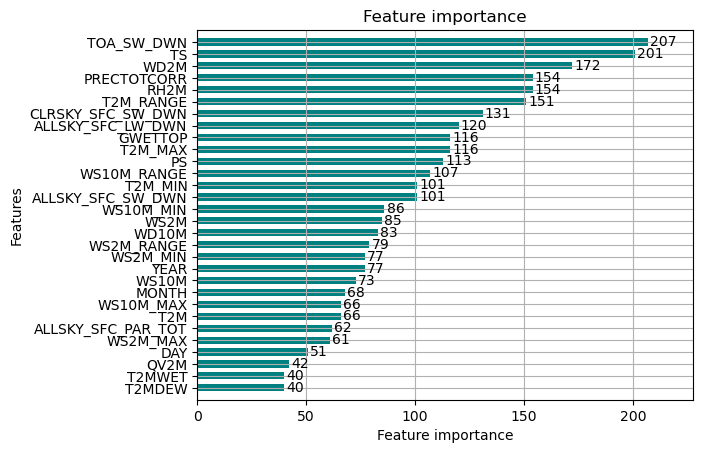

In [9]:
from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from matplotlib import pyplot as plt

# fit model on training data
model = LGBMRegressor()
model.fit(X, y)

# plot feature importance
plot_importance(model, max_num_features=32, color='teal', height=0.6)
plt.show()


In [10]:
import numpy as np
import warnings
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
model = LGBMRegressor(device='gpu')
model.fit(X_train, y_train)

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Khởi tạo một danh sách để lưu trữ độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp các giá trị độ quan trọng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Lặp qua các ngưỡng và chọn ngưỡng tốt nhất
best_threshold = 0
best_adj_r2_train = -np.inf
best_adj_r2_val = -np.inf
best_adj_r2_test = -np.inf
for thresh in feature_importances[sorted_indices]:
    # Chọn các đặc trưng sử dụng ngưỡng
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_val = selection.transform(X_val)
    select_X_test = selection.transform(X_test)
    
    # Huấn luyện mô hình
    selection_model = LGBMRegressor(device='gpu')
    selection_model.fit(select_X_train, y_train)
    
    # Đánh giá mô hình trên tập validation
    predictions_val = selection_model.predict(select_X_val)
    r2_val = r2_score(y_val, predictions_val)
    n_samples_val = select_X_val.shape[0]
    n_features_val = select_X_val.shape[1]
    adj_r2_val = 1 - (1 - r2_val) * (n_samples_val - 1) / (n_samples_val - n_features_val - 1)
    
    # Đánh giá mô hình trên tập huấn luyện
    predictions_train = selection_model.predict(select_X_train)
    r2_train = r2_score(y_train, predictions_train)
    n_samples_train = select_X_train.shape[0]
    n_features_train = select_X_train.shape[1]
    adj_r2_train = 1 - (1 - r2_train) * (n_samples_train - 1) / (n_samples_train - n_features_train - 1)
    
    # Đánh giá mô hình trên tập kiểm thử
    predictions_test = selection_model.predict(select_X_test)
    r2_test = r2_score(y_test, predictions_test)
    n_samples_test = select_X_test.shape[0]
    n_features_test = select_X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n_samples_test - 1) / (n_samples_test - n_features_test - 1)
    
    # Lưu giữ ngưỡng và R^2 hiệu chỉnh tốt nhất trên tập validation
    if adj_r2_val > best_adj_r2_val:
        best_adj_r2_val = adj_r2_val
        best_adj_r2_train = adj_r2_train
        best_adj_r2_test = adj_r2_test
        best_threshold = thresh

# In ra ngưỡng và R^2 hiệu chỉnh tốt nhất
print("Ngưỡng được chọn:", best_threshold)
print("R^2 hiệu chỉnh trên tập huấn luyện: %.5f" % best_adj_r2_train)
print("R^2 hiệu chỉnh trên tập validation: %.5f" % best_adj_r2_val)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % best_adj_r2_test)


Ngưỡng được chọn: 64
R^2 hiệu chỉnh trên tập huấn luyện: 0.96996
R^2 hiệu chỉnh trên tập validation: 0.96462
R^2 hiệu chỉnh trên tập kiểm thử: 0.96290


In [11]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
model = LGBMRegressor(device='gpu')
model.fit(X_train, y_train)

# Lấy độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp các giá trị độ quan trọng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Chọn ngưỡng dựa trên độ quan trọng
best_threshold = feature_importances[sorted_indices[11]]  # Chọn 12 biến

# Chọn các đặc trưng sử dụng ngưỡng
selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Huấn luyện lại mô hình với các đặc trưng đã chọn
selection_model = LGBMRegressor(device='gpu')
selection_model.fit(select_X_train, y_train)

# Đánh giá mô hình trên tập huấn luyện
predictions_train = selection_model.predict(select_X_train)
r2_train = r2_score(y_train, predictions_train)
n_samples_train = select_X_train.shape[0]
n_features_train = select_X_train.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_samples_train - 1) / (n_samples_train - n_features_train - 1)

# Đánh giá mô hình trên tập validation
predictions_val = selection_model.predict(select_X_val)
r2_val = r2_score(y_val, predictions_val)
n_samples_val = select_X_val.shape[0]
n_features_val = select_X_val.shape[1]
adj_r2_val = 1 - (1 - r2_val) * (n_samples_val - 1) / (n_samples_val - n_features_val - 1)

# Đánh giá mô hình trên tập kiểm thử
predictions_test = selection_model.predict(select_X_test)
r2_test = r2_score(y_test, predictions_test)
n_samples_test = select_X_test.shape[0]
n_features_test = select_X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_samples_test - 1) / (n_samples_test - n_features_test - 1)

# In ra ngưỡng và R^2 hiệu chỉnh tốt nhất
print("Ngưỡng được chọn:", best_threshold)
print("R^2 hiệu chỉnh trên tập huấn luyện: %.5f" % adj_r2_train)
print("R^2 hiệu chỉnh trên tập validation: %.5f" % adj_r2_val)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % adj_r2_test)


Ngưỡng được chọn: 110
R^2 hiệu chỉnh trên tập huấn luyện: 0.96283
R^2 hiệu chỉnh trên tập validation: 0.95574
R^2 hiệu chỉnh trên tập kiểm thử: 0.95649


In [252]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

# Assume you have select_X_train, select_X_val, select_X_test, y_train, y_val, y_test defined

# Sử dụng Bayesian Optimization để tìm siêu tham số tối ưu
opt = BayesSearchCV(
    LGBMRegressor(device='gpu'),
    search_spaces={
        'learning_rate': (0.001, 0.1, 'log-uniform'),
        'n_estimators': (250, 500),
        'max_depth': (3, 10),
        'min_child_weight': (1, 10)
    },
    n_iter=50,  # Số lượng điểm thử nghiệm
    cv=3
)

# Fit mô hình với Bayesian Optimization
opt.fit(select_X_train, y_train)

# Lấy siêu tham số tốt nhất
best_params = opt.best_params_

# In ra các siêu tham số tốt nhất
print("Siêu tham số tốt nhất:", best_params)

# Sử dụng siêu tham số tốt nhất để huấn luyện lại mô hình trên tập huấn luyện và đánh giá trên tập kiểm thử
best_model = LGBMRegressor(device='gpu', **best_params)
best_model.fit(select_X_train, y_train)

# Đánh giá mô hình trên tập kiểm thử
test_predictions = best_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % test_r2)


Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.1), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 500)])
R^2 hiệu chỉnh trên tập kiểm thử: 0.98184


Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.1), ('max_depth', 10), ('min_child_weight', 10), ('n_estimators', 500)])
R^2 hiệu chỉnh trên tập kiểm thử: 0.98538

In [12]:
# Lấy danh sách các đặc trưng được chọn
selected_features = np.array(X_train.columns)[selection.get_support()]

# In danh sách các đặc trưng được chọn
print("Các đặc trưng được chọn:")
print(selected_features)


Các đặc trưng được chọn:
['CLRSKY_SFC_SW_DWN' 'TOA_SW_DWN' 'TS' 'T2M_RANGE' 'T2M_MAX'
 'ALLSKY_SFC_LW_DWN' 'RH2M' 'PRECTOTCORR' 'PS' 'WD2M' 'WD10M' 'GWETTOP']


LightGBM

In [13]:
import numpy as np
import warnings
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Vô hiệu hóa các cảnh báo liên quan đến đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình hồi quy LightGBM trên toàn bộ dữ liệu huấn luyện
model = LGBMRegressor()
model.fit(X_train, y_train)

# Lấy tầm quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp tầm quan trọng của các đặc trưng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Chọn ngưỡng dựa trên tầm quan trọng của các đặc trưng
best_threshold = feature_importances[sorted_indices[11]]  # Chọn 12 đặc trưng hàng đầu

# Chọn các đặc trưng bằng cách sử dụng ngưỡng
selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Định nghĩa trọng số lớp nếu cần
class_weights = [...]  # Tính toán trọng số lớp nếu đối mặt với các lớp không cân bằng

# Cung cấp các siêu tham số tối ưu
best_params = {
    'learning_rate': 0.1,
    'max_depth': 10,
    'min_child_weight':10,
    'n_estimators': 500,
    # Thêm các siêu tham số khác nếu có
}

# Huấn luyện mô hình hồi quy LightGBM cuối cùng
final_model = LGBMRegressor(**best_params)
final_model.fit(select_X_train, y_train)

# Đánh giá hiệu suất
train_predictions = final_model.predict(select_X_train)
train_r2 = r2_score(y_train, train_predictions)

val_predictions = final_model.predict(select_X_val)
val_r2 = r2_score(y_val, val_predictions)

test_predictions = final_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)

print("R^2 trên tập huấn luyện:", train_r2)
print("R^2 trên tập xác thực:", val_r2)
print("R^2 trên tập kiểm tra:", test_r2)


R^2 trên tập huấn luyện: 0.9901403056126121
R^2 trên tập xác thực: 0.9832173135268476
R^2 trên tập kiểm tra: 0.9828414106728882


test

[1]	training's rmse: 5.28174	training's l2: 27.8967	valid_1's rmse: 5.2627	valid_1's l2: 27.696	valid_2's rmse: 5.26197	valid_2's l2: 27.6883
[2]	training's rmse: 5.16705	training's l2: 26.6984	valid_1's rmse: 5.14891	valid_1's l2: 26.5113	valid_2's rmse: 5.14757	valid_2's l2: 26.4975
[3]	training's rmse: 5.05531	training's l2: 25.5562	valid_1's rmse: 5.03802	valid_1's l2: 25.3816	valid_2's rmse: 5.03607	valid_2's l2: 25.362
[4]	training's rmse: 4.94643	training's l2: 24.4672	valid_1's rmse: 4.92993	valid_1's l2: 24.3042	valid_2's rmse: 4.92746	valid_2's l2: 24.2798
[5]	training's rmse: 4.8404	training's l2: 23.4295	valid_1's rmse: 4.82458	valid_1's l2: 23.2766	valid_2's rmse: 4.82171	valid_2's l2: 23.2489
[6]	training's rmse: 4.73713	training's l2: 22.4404	valid_1's rmse: 4.72201	valid_1's l2: 22.2974	valid_2's rmse: 4.71871	valid_2's l2: 22.2662
[7]	training's rmse: 4.6365	training's l2: 21.4972	valid_1's rmse: 4.62195	valid_1's l2: 21.3624	valid_2's rmse: 4.61841	valid_2's l2: 21.32

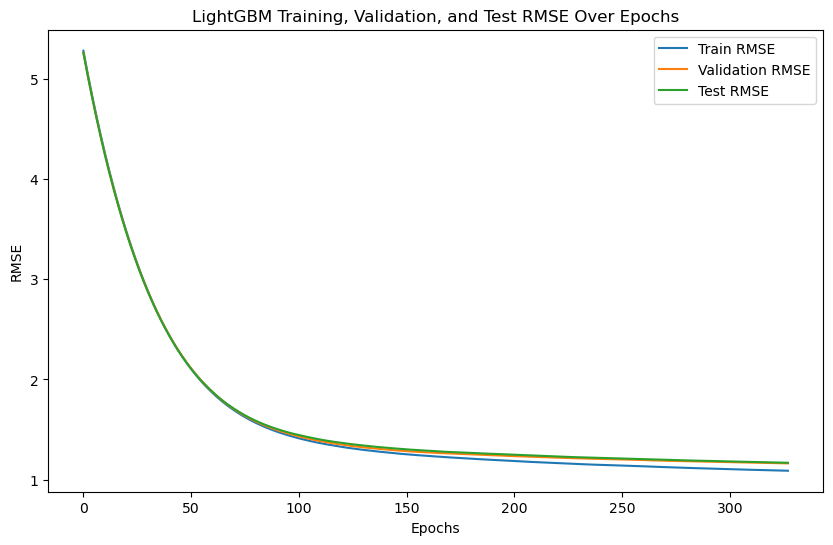

In [16]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Vô hiệu hóa các cảnh báo liên quan đến đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình hồi quy LightGBM trên toàn bộ dữ liệu huấn luyện
model = LGBMRegressor()
model.fit(X_train, y_train)

# Lấy tầm quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp tầm quan trọng của các đặc trưng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Kiểm tra kích thước của mảng feature_importances
num_features = len(feature_importances)
num_selected_features = min(12, num_features)

# Chọn ngưỡng dựa trên tầm quan trọng của các đặc trưng
best_threshold = feature_importances[sorted_indices[num_selected_features - 1]]  # Chọn số đặc trưng hàng đầu dựa trên kích thước

# Chọn các đặc trưng bằng cách sử dụng ngưỡng
selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Cung cấp các siêu tham số tối ưu
best_params = {
    'learning_rate': 0.023792418861498552,
    'max_depth': 10,
    'n_estimators': 328,
    # Thêm các siêu tham số khác nếu có
}

# Huấn luyện mô hình hồi quy LightGBM cuối cùng với early stopping
final_model = LGBMRegressor(**best_params)
final_model.fit(select_X_train, y_train,
                eval_set=[(select_X_train, y_train), (select_X_val, y_val), (select_X_test, y_test)],
                early_stopping_rounds=20,  # Số vòng lặp không cải thiện trước khi dừng
                verbose=True,
                eval_metric='rmse')  # Sử dụng RMSE làm độ đo đánh giá

# Đánh giá hiệu suất bằng R^2 hiệu chỉnh
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted_r2

train_predictions = final_model.predict(select_X_train, num_iteration=final_model.best_iteration_)
train_r2 = adjusted_r2_score(y_train, train_predictions, len(y_train), select_X_train.shape[1])

val_predictions = final_model.predict(select_X_val, num_iteration=final_model.best_iteration_)
val_r2 = adjusted_r2_score(y_val, val_predictions, len(y_val), select_X_val.shape[1])

test_predictions = final_model.predict(select_X_test, num_iteration=final_model.best_iteration_)
test_r2 = adjusted_r2_score(y_test, test_predictions, len(y_test), select_X_test.shape[1])

print("Adjusted R^2 trên tập huấn luyện:", train_r2)
print("Adjusted R^2 trên tập xác thực:", val_r2)
print("Adjusted R^2 trên tập kiểm tra:", test_r2)

# Lấy kết quả đánh giá từ quá trình huấn luyện
evals_result = final_model.evals_result_

# Vẽ đồ thị quá trình hội tụ
epochs = len(evals_result['training']['rmse'])
x_axis = range(0, epochs)

# Đồ thị RMSE trên tập huấn luyện, xác thực và kiểm tra
plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['training']['rmse'], label='Train RMSE')
plt.plot(x_axis, evals_result['valid_1']['rmse'], label='Validation RMSE')
plt.plot(x_axis, evals_result['valid_2']['rmse'], label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('LightGBM Training, Validation, and Test RMSE Over Epochs')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import r2_score

# Calculate R^2 score on test set
test_r2_2 = r2_score(y_test, test_predictions)

print("Adjusted R^2 trên tập kiểm tra:", test_r2)
print("R^2 trên tập kiểm tra:", test_r2_2)


Adjusted R^2 trên tập kiểm tra: 0.9526806982663969
R^2 trên tập kiểm tra: 0.952789021734692


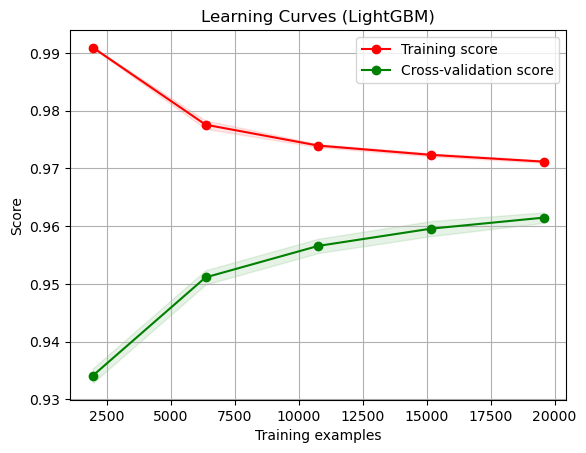

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from lightgbm import LGBMRegressor
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title_lgbm = "Learning Curves (LightGBM)"
cv = 5  # Số lượng folds trong cross-validation
estimator_lgbm = LGBMRegressor()
plot_learning_curve(estimator_lgbm, title_lgbm, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()


test


In [257]:
# Calculate adjusted R²
n_samples = select_X_val.shape[0]
n_features = select_X_val.shape[1]
adj_r2_train = 1 - (1 - train_r2) * (n_samples - 1) / (n_samples - n_features - 1)

n_samples = select_X_val.shape[0]
n_features = select_X_val.shape[1]
adj_r2_val = 1 - (1 - val_r2) * (n_samples - 1) / (n_samples - n_features - 1)

n_samples = select_X_test.shape[0]
n_features = select_X_test.shape[1]
adj_r2_test = 1 - (1 - test_r2) * (n_samples - 1) / (n_samples - n_features - 1)

print("Adjusted R² on training set:", adj_r2_train)
print("Adjusted R² on validation set:", adj_r2_val)
print("Adjusted R² on test set:", adj_r2_test)


Adjusted R² on training set: 0.9591847629451268
Adjusted R² on validation set: 0.9530871991912926
Adjusted R² on test set: 0.9525721262547711


In [258]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Đánh giá trên tập test
test_predictions = final_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)
test_n = select_X_test.shape[0]
test_p = select_X_test.shape[1]
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

# Tính Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, test_predictions)

# Tính Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, test_predictions)

# Tính Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# In kết quả
print("Adjusted R² on test set:", test_adj_r2)
print("Mean Absolute Error on test set:", mae_test)
print("Mean Squared Error on test set:", mse_test)
print("Root Mean Squared Error on test set:", rmse_test)



Adjusted R² on test set: 0.9526806982663969
Mean Absolute Error on test set: 0.8538759754190465
Mean Squared Error on test set: 1.366128948583479
Root Mean Squared Error on test set: 1.168815190089297


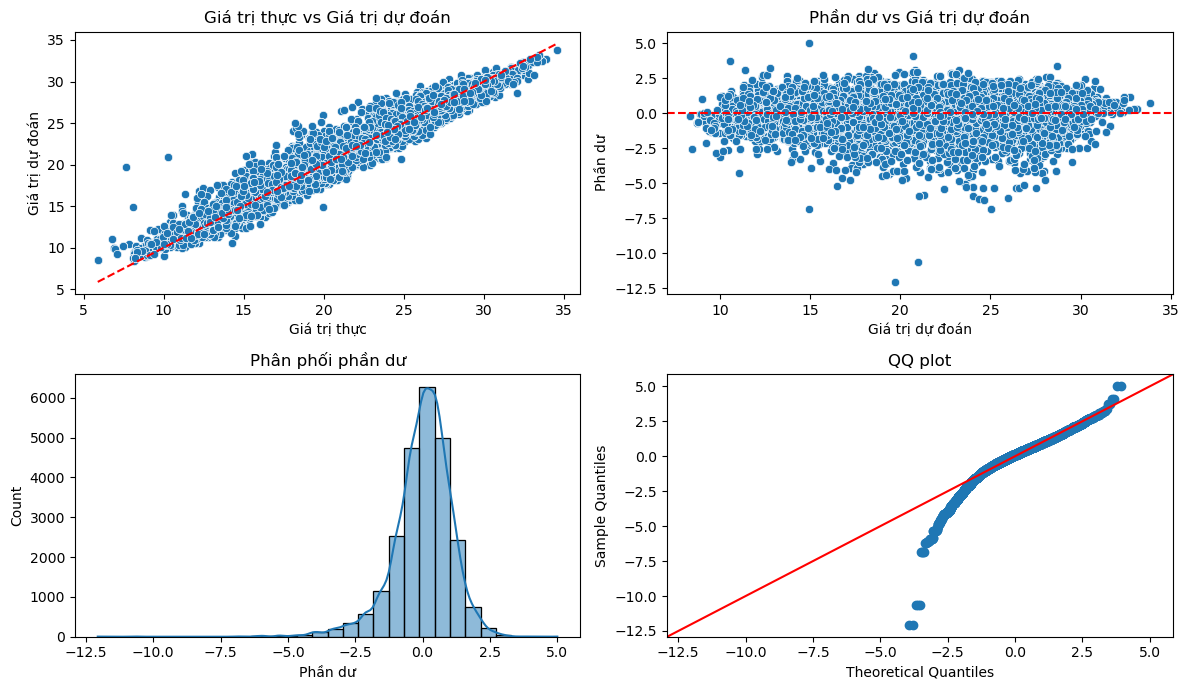

In [259]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import statsmodels.api as sm

# Giả sử 'final_model' là đối tượng mô hình của bạn
# select_X_train và y_train là dữ liệu huấn luyện mà bạn đã sử dụng để tạo mô hình

# Tùy chọn in
np.set_printoptions(threshold=10000)

# Các giá trị dự đoán
fitted_values = final_model.predict(select_X_train)
#print(fitted_values)

# Các giá trị phần dư
residuals = y_train - fitted_values
#print(residuals)

# Thiết lập vẽ biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Biểu đồ giá trị thực so với giá trị dự đoán
sns.scatterplot(x=y_train, y=fitted_values, ax=axs[0, 0])
axs[0, 0].set_xlabel('Giá trị thực')
axs[0, 0].set_ylabel('Giá trị dự đoán')
axs[0, 0].set_title('Giá trị thực vs Giá trị dự đoán')
axs[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')

# Biểu đồ phần dư
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0, 1])
axs[0, 1].set_xlabel('Giá trị dự đoán')
axs[0, 1].set_ylabel('Phần dư')
axs[0, 1].set_title('Phần dư vs Giá trị dự đoán')
axs[0, 1].axhline(0, color='red', linestyle='--')

# Biểu đồ phân phối phần dư
sns.histplot(residuals, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Phần dư')
axs[1, 0].set_title('Phân phối phần dư')

# QQ plot
sm.qqplot(residuals, line ='45', ax=axs[1, 1])
axs[1, 1].set_title('QQ plot')

plt.tight_layout()
plt.show()


In [260]:
import joblib

# Lưu mô hình vào một file
joblib.dump(final_model, 'lightgbm_model.pkl')

# Bạn cũng có thể sử dụng đuôi .joblib


['lightgbm_model.pkl']